In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
dataset = pd.read_csv("F:\Internship_Works\cars.csv")

In [3]:
dataset.shape

(10668, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
dataset.duplicated().sum()

103

In [9]:
dataset.drop_duplicates(inplace= True)

In [10]:
dataset.duplicated().sum()

0

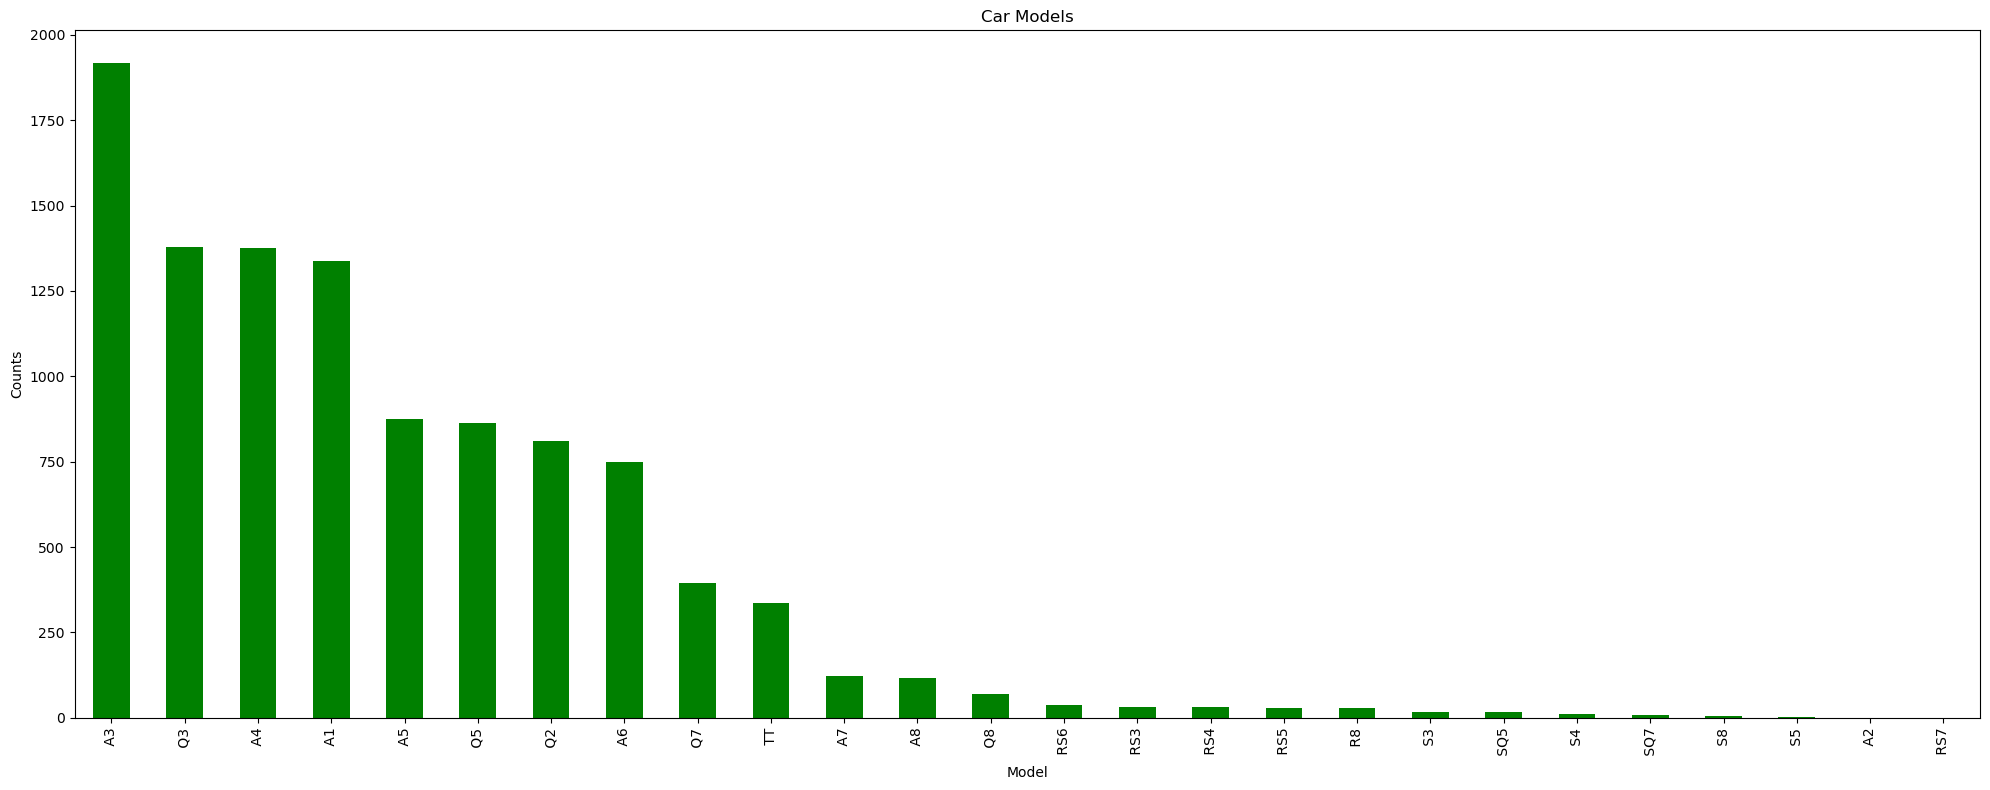

In [11]:
cars = dataset['model'].value_counts()
plt.figure(figsize=(20,8))
cars.plot(kind= 'bar', color= 'g')
plt.title("Car Models")
plt.xlabel("Model")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

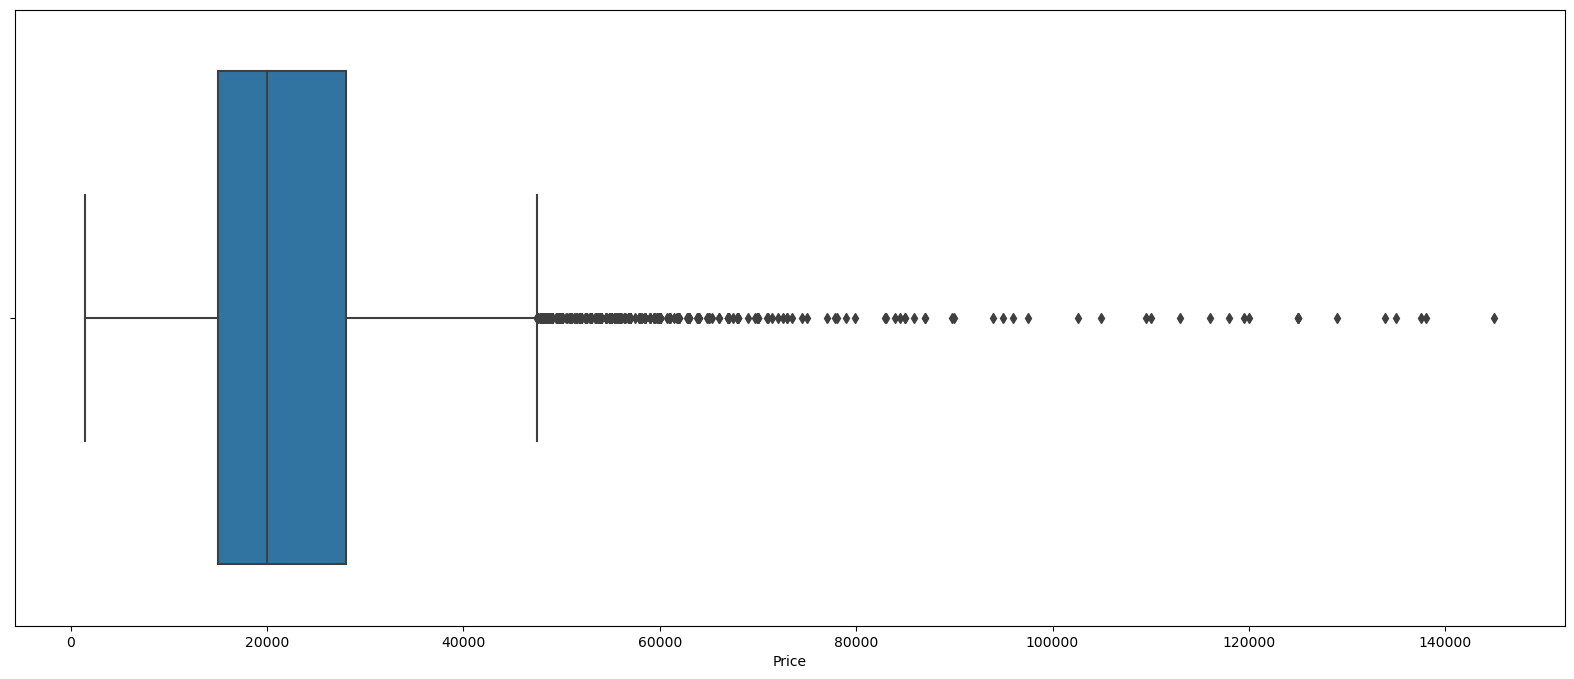

In [12]:
plt.figure(figsize= (20, 8))
sns.boxplot(x= dataset['price'])
plt.xlabel("Price")
plt.show()

In [13]:
print(dataset.fuelType.value_counts())

fuelType
Diesel    5537
Petrol    5000
Hybrid      28
Name: count, dtype: int64


In [14]:
print(dataset.transmission.value_counts())

transmission
Manual       4317
Semi-Auto    3568
Automatic    2680
Name: count, dtype: int64


In [15]:
dataset.replace({'fuelType' : {'Diesel':0, 'Petrol':1, 'Hybrid':2}}, inplace= True)

In [16]:
dataset.replace({'transmission' : {'Manual':0, 'Semi-Auto':1, 'Automatic':2}}, inplace= True)

In [17]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,1,150,55.4,1.4
1,A6,2016,16500,2,36203,0,20,64.2,2.0
2,A1,2016,11000,0,29946,1,30,55.4,1.4
3,A4,2017,16800,2,25952,0,145,67.3,2.0
4,A3,2019,17300,0,1998,1,145,49.6,1.0


In [18]:
X = dataset.drop(['model', 'price'], axis= 1)
Y = dataset['price']

In [19]:
print(X.shape, Y.shape)

(10565, 7) (10565,)


In [20]:
print(X)

       year  transmission  mileage  fuelType  tax   mpg  engineSize
0      2017             0    15735         1  150  55.4         1.4
1      2016             2    36203         0   20  64.2         2.0
2      2016             0    29946         1   30  55.4         1.4
3      2017             2    25952         0  145  67.3         2.0
4      2019             0     1998         1  145  49.6         1.0
...     ...           ...      ...       ...  ...   ...         ...
10663  2020             0     4018         1  145  49.6         1.0
10664  2020             0     1978         1  150  49.6         1.0
10665  2020             0      609         1  150  49.6         1.0
10666  2017             2     8646         1  150  47.9         1.4
10667  2016             0    11855         1  150  47.9         1.4

[10565 rows x 7 columns]


In [21]:
print(Y)

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664    16999
10665    17199
10666    19499
10667    15999
Name: price, Length: 10565, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [23]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(9508, 7) (9508,)
(1057, 7) (1057,)


In [24]:
lr_model = LinearRegression()

In [25]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
y_predicted = lr_model.predict(X_test)

In [27]:
print("R2 Score :", r2_score(Y_test, y_predicted))

R2 Score : 0.7943332658034958


In [28]:
print("Mean Absolute Error :", mean_absolute_error(Y_test,y_predicted))

Mean Absolute Error : 3348.151240111435


In [29]:
import joblib

In [31]:
joblib.dump(lr_model, 'car_price_predictor')

['car_price_predictor']

In [32]:
model = joblib.load('car_price_predictor')